In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#read data
data=pd.read_excel('/content/sample_data/iris-2.xls')

In [4]:
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
#data preprocessing



In [6]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [7]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [9]:
data1=data[['SL', 'SW', 'PL']]

In [10]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='mean')
imputer=imputer.fit(data1)
data1=imputer.transform(data1)

In [11]:
data1=pd.DataFrame(data1,columns=['SL', 'SW', 'PL'])

In [12]:
type(data1)

pandas.core.frame.DataFrame

In [13]:
data1

,SL,SW,PL
0,5.100000,3.5,1.40000
1,4.900000,3.0,1.40000
2,5.855944,3.2,1.30000
3,4.600000,3.1,1.50000
4,5.000000,3.6,1.40000
...,...,...,...
145,6.700000,3.0,5.20000
146,6.300000,2.5,5.00000
147,6.500000,3.0,3.75625
148,6.200000,3.4,5.40000


In [14]:
data1.isna().sum()

SL    0
SW    0
PL    0
dtype: int64

In [15]:
data=data.drop(['SL', 'SW', 'PL'],axis=1)

In [16]:
data=pd.concat([data1,data],axis=1)

In [17]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [18]:
data

,SL,SW,PL,PW,Classification
0,5.100000,3.5,1.40000,0.2,Iris-setosa
1,4.900000,3.0,1.40000,0.2,Iris-setosa
2,5.855944,3.2,1.30000,0.2,Iris-setosa
3,4.600000,3.1,1.50000,0.2,Iris-setosa
4,5.000000,3.6,1.40000,0.2,Iris-setosa
...,...,...,...,...,...
145,6.700000,3.0,5.20000,2.3,Iris-virginica
146,6.300000,2.5,5.00000,1.9,Iris-virginica
147,6.500000,3.0,3.75625,2.0,Iris-virginica
148,6.200000,3.4,5.40000,2.3,Iris-virginica


In [19]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [20]:
#classification algorithm


In [21]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
data['Classification']=label_encoder.fit_transform(data['Classification'])


In [22]:
data

,SL,SW,PL,PW,Classification
0,5.100000,3.5,1.40000,0.2,0
1,4.900000,3.0,1.40000,0.2,0
2,5.855944,3.2,1.30000,0.2,0
3,4.600000,3.1,1.50000,0.2,0
4,5.000000,3.6,1.40000,0.2,0
...,...,...,...,...,...
145,6.700000,3.0,5.20000,2.3,2
146,6.300000,2.5,5.00000,1.9,2
147,6.500000,3.0,3.75625,2.0,2
148,6.200000,3.4,5.40000,2.3,2


In [23]:
x=data.drop(['Classification'],axis=1)

In [24]:
y=data['Classification']

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [ ]:
#SVM


In [48]:
from sklearn.svm import SVC

In [49]:
svm_clf=SVC(kernel='rbf')

In [50]:
svm_clf.fit(x_train,y_train)

SVC()

In [51]:
y_pred=svm_clf.predict(x_test)

In [52]:
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

In [53]:
accuracy_score(y_test,y_pred)

1.0

In [ ]:
#DECISION TREE

In [54]:
from sklearn.tree import DecisionTreeClassifier

In [55]:
dt_clf=DecisionTreeClassifier(random_state=42)

In [56]:
dt_clf.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [57]:

y_pred=dt_clf.predict(x_test)

In [58]:
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

In [59]:
accuracy_score(y_test,y_pred)

1.0

In [ ]:
#RANDOM FOREST

In [60]:
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier()
rf_clf.fit(x_train,y_train)
y_pred=rf_clf.predict(x_test)

In [61]:
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

In [62]:
accuracy_score(y_test,y_pred)

1.0

In [ ]:
#KNN

In [29]:
from sklearn.neighbors import KNeighborsClassifier

In [26]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [27]:
metric_k=[]
neighbors=np.arange(3,120)

In [46]:
for k in neighbors:
  classifier=KNeighborsClassifier(n_neighbors=k,metric='euclidean')
  classifier.fit(x_train,y_train)
  y_prediction=classifier.predict(x_test)
  acc=accuracy_score(y_test,y_prediction)
  metric_k.append(acc)

In [42]:
metric_k

[0.9666666666666667,
 1.0,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9666666666666667,
 1.0,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 1.0,
 1.0,
 0.9666666666666667,
 1.0,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9333333333333333,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9333333333333333,
 0.9,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333

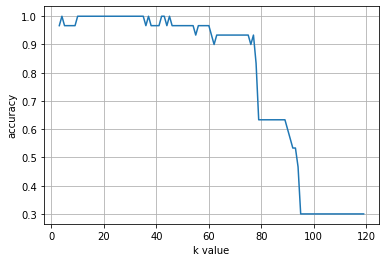

In [ ]:
plt.plot(neighbors,metric_k)
plt.xlabel("k value")
plt.ylabel("accuracy")
plt.grid()

In [47]:
for k in neighbors:
  classifier=KNeighborsClassifier(n_neighbors=20,metric='euclidean')
  classifier.fit(x_train,y_train)
  y_prediction=classifier.predict(x_test)